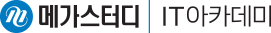

# 입문자를 위한, 머신러닝 기초   

### `활용실습(1)` : 공공데이터 분석 및 시각화 연습 (서울 상권분석)

https://www.data.go.kr/ 

#### 주요 Package import :

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 상권분석 csv 파일 데이터 읽기 :

In [2]:
shop = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202109.csv", encoding='utf-8') # encoding='cp949', utf-8, euc-kr

### 데이터 확인 :

- 상권정보 중, 서울, 부산 지역만 있는 데이터
- 어떤 정보를 활용할 수 있을지 컬럼을 통한 사전 파악


In [4]:
shop.columns
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325880 entries, 0 to 325879
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     325880 non-null  int64  
 1   상호명        325879 non-null  object 
 2   지점명        59613 non-null   object 
 3   상권업종대분류코드  325880 non-null  object 
 4   상권업종대분류명   325880 non-null  object 
 5   상권업종중분류코드  325880 non-null  object 
 6   상권업종중분류명   325880 non-null  object 
 7   상권업종소분류코드  325880 non-null  object 
 8   상권업종소분류명   325880 non-null  object 
 9   표준산업분류코드   306407 non-null  object 
 10  표준산업분류명    306407 non-null  object 
 11  시도코드       325880 non-null  int64  
 12  시도명        325880 non-null  object 
 13  시군구코드      325880 non-null  int64  
 14  시군구명       325880 non-null  object 
 15  행정동코드      325880 non-null  int64  
 16  행정동명       325235 non-null  object 
 17  법정동코드      325880 non-null  int64  
 18  법정동명       325880 non-null  object 
 19  지번코드       325880 non-n

In [5]:
print(shop.shape)
shop.head(2)

(325880, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
1,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613


In [9]:
shop.loc[0]

상가업소번호                        22767534
상호명                             BYC상신점
지점명                                상신점
상권업종대분류코드                            D
상권업종대분류명                            소매
상권업종중분류코드                          D05
상권업종중분류명                          의복의류
상권업종소분류코드                       D05A07
상권업종소분류명                      셔츠/내의/속옷
표준산업분류코드                           NaN
표준산업분류명                            NaN
시도코드                                11
시도명                              서울특별시
시군구코드                            11710
시군구명                               송파구
행정동코드                       1171053200
행정동명                              거여2동
법정동코드                       1171011300
법정동명                               거여동
지번코드               1171011300100360000
대지구분코드                               1
대지구분명                               대지
지번본번지                               36
지번부번지                              NaN
지번주소                  서울특별시 송파구 거여동 36
도로명코드                    

### 커피 업종에 대한 분석 :

- 매장 상위권 중심으로 파악
- 스타벅스, 이디야 등 중심으로 매장 위치 파악


In [11]:
## 커피 업종인 것만 발췌 :

shop_coffee = shop[shop["상권업종중분류명"] == "커피점/카페"]

print(shop_coffee.shape)
shop_coffee.head(1)

(19703, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
29,20659878,커피빈,코리아대학로대명거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111017200100510000032165,NaN,서울특별시 종로구 대명길 25,110524,3078.0,NaN,3,NaN,127.000171,37.583149


### 스타벅스 매장 정보 다뤄보기

In [23]:
shop_coffee["상호명"].nunique()
shop_coffee["상호명"].value_counts()

카페         540
이디야커피      382
스타벅스       337
투썸플레이스     169
메가엠지씨커피    127
          ... 
베리굿슬라임       1
해마티룸         1
데이지공방        1
구의문복합식당      1
소통과공감센터      1
Name: 상호명, Length: 13905, dtype: int64

In [12]:
shop_coffee_sb = shop_coffee[shop_coffee["상호명"].str.contains("스타벅스")]
shop_coffee_id = shop_coffee[shop_coffee["상호명"].str.contains("이디야")]

shop_coffee_sb.shape, shop_coffee_id.shape

((488, 39), (434, 39))

### 시각화 분석 :

#### 주요 Package import :

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
## 한글 깨지는 문제 해결용 :
plt.rc('font', family='Malgun Gothic')     # for Windows
#matplotlib.rc('font', family='AppleGothic')       # for Mac

In [16]:
shop_coffee_sb.loc[1538]

상가업소번호                        20585779
상호명                               스타벅스
지점명                             동숭로아트점
상권업종대분류코드                            Q
상권업종대분류명                            음식
상권업종중분류코드                          Q12
상권업종중분류명                        커피점/카페
상권업종소분류코드                       Q12A01
상권업종소분류명                   커피전문점/카페/다방
표준산업분류코드                        I56220
표준산업분류명                       비알콜 음료점업
시도코드                                11
시도명                              서울특별시
시군구코드                            11110
시군구명                               종로구
행정동코드                       1111064000
행정동명                               이화동
법정동코드                       1111016800
법정동명                               동숭동
지번코드               1111016800100300000
대지구분코드                               1
대지구분명                               대지
지번본번지                               30
지번부번지                              NaN
지번주소                  서울특별시 종로구 동숭동 30
도로명코드                    

In [24]:
lst_ord = shop_coffee["시군구명"].unique()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

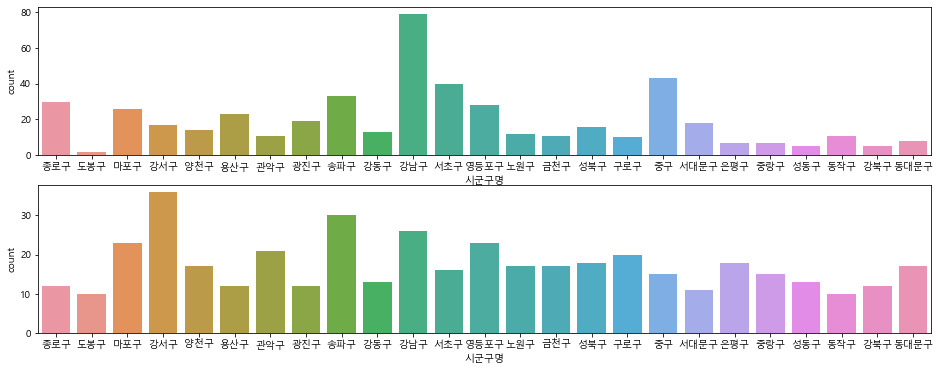

In [25]:
figure, (a1,a2) = plt.subplots(2,1)
figure.set_size_inches(16,6)
# plt.figure(figsize=(16,6))

sns.countplot(data=shop_coffee_sb, x="시군구명", ax=a1, order=lst_ord )
sns.countplot(data=shop_coffee_id, x="시군구명", ax=a2, order=lst_ord )

In [18]:
df_pivot = pd.pivot_table(data=shop_coffee_sb, index="시군구명", 
                          values="상호명", aggfunc='count').sort_values(by="상호명", ascending=False)
df_pivot.columns
df_pivot.index

Index(['강남구', '중구', '서초구', '송파구', '종로구', '영등포구', '마포구', '용산구', '광진구', '서대문구',
       '강서구', '성북구', '양천구', '강동구', '노원구', '관악구', '금천구', '동작구', '구로구', '동대문구',
       '은평구', '중랑구', '성동구', '강북구', '도봉구'],
      dtype='object', name='시군구명')

<AxesSubplot:xlabel='count', ylabel='시군구명'>

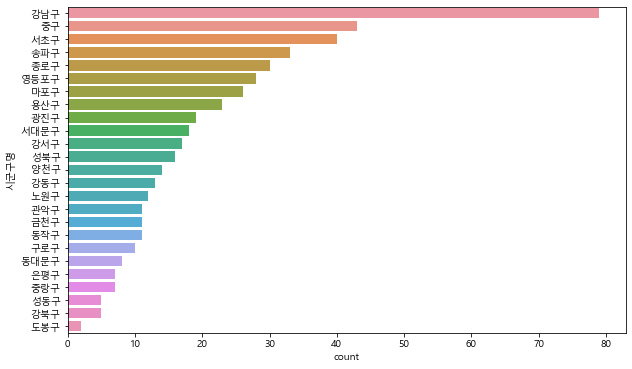

In [47]:
plt.figure(figsize=(10,6))

sns.countplot(data=shop_coffee_sb, y="시군구명", order=df_pivot.index)

<AxesSubplot:xlabel='경도', ylabel='위도'>

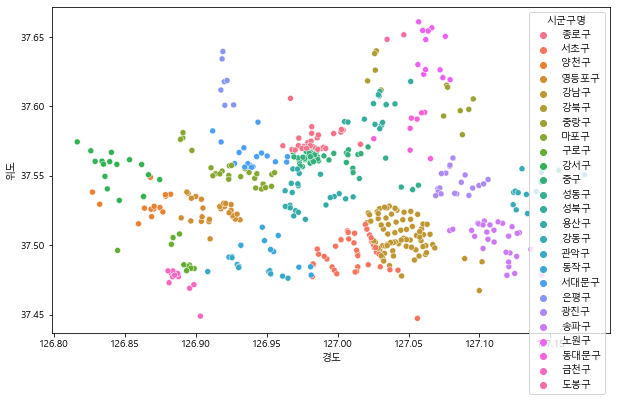

In [53]:
plt.figure(figsize=(10,6))

# sns.scatterplot(data=shop, x='경도', y='위도', hue="시군구명")
# sns.scatterplot(data=shop_coffee, x='경도', y='위도', hue="시군구명")
sns.scatterplot(data=shop_coffee_sb, x='경도', y='위도', hue="시군구명")


In [35]:
shop_coffee_sb.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

#### 지도(Map) 시각화:

#### Folium 예제 참조 :

- 예제 사이트 : https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
- Quickstart : https://python-visualization.github.io/folium/quickstart.html

In [ ]:
!pip install folium

In [29]:
# !conda install -c conda-forge folium
# !pip install folium

import folium 

In [61]:
shop_coffee_sb["위도"].mean(), shop_coffee_sb["경도"].mean()

(37.5371401439053, 126.99643563347644)

In [32]:
map1 = folium.Map(location=[shop_coffee_sb["위도"].mean(), shop_coffee_sb["경도"].mean()], zoom_start=10)

In [33]:
folium.Marker(location=[37.5371401439053, 126.99643], 
              icon=folium.Icon(color='green', icon='star')).add_to(map1)

In [50]:
shop_coffee_id.loc[1037, "지점명"]

'신길역점'

In [52]:
for idx in shop_coffee_sb.index:
    a = shop_coffee_sb.loc[idx, "위도"]
    b = shop_coffee_sb.loc[idx, "경도"]
    c = shop_coffee_sb.loc[idx, "지점명"]
    folium.Marker(location=[a, b], tooltip=c,
                  icon=folium.Icon(color='green', icon='star')).add_to(map1)

In [53]:
for idx in shop_coffee_id.index:
    a = shop_coffee_id.loc[idx, "위도"]
    b = shop_coffee_id.loc[idx, "경도"]
    c = shop_coffee_id.loc[idx, "지점명"]
    folium.Marker(location=[a, b], popup=c).add_to(map1)

In [54]:
map1

#### CircleMarker

In [89]:
map2 = folium.Map(location=[shop_coffee_sb["위도"].mean(), shop_coffee_sb["경도"].mean()], zoom_start=10)

In [56]:
folium.CircleMarker(location=[37.5371401439053, 126.99643], 
                    radius=3).add_to(map2)

In [59]:
pivot_sb = pd.pivot_table(data=shop_coffee_sb, index="시군구명", values="상호명", aggfunc='count')

In [60]:
pivot_id = pd.pivot_table(data=shop_coffee_id, index="시군구명", values="상호명", aggfunc='count')

In [66]:
shop_coffee_sb.loc[shop_coffee_sb["시군구명"] == "강남구", "위도"].mean()
shop_coffee_sb.loc[shop_coffee_sb["시군구명"] == "강남구", "경도"].mean()

127.04526226004812

In [71]:
pivot_sb.head(3)

,상호명
시군구명,
강남구,79
강동구,13
강북구,5


In [72]:
pivot_sb.loc["강남구", "상호명"]

79

In [90]:
for idx in pivot_sb.index:
    a = shop_coffee_sb.loc[shop_coffee_sb["시군구명"] == idx, "위도"].mean()
    b = shop_coffee_sb.loc[shop_coffee_sb["시군구명"] == idx, "경도"].mean()
    c = int(pivot_sb.loc[idx, "상호명"])
    folium.CircleMarker(location=[a, b], radius=c, color='green').add_to(map2)

In [91]:
for idx in pivot_id.index:
    a = shop_coffee_id.loc[shop_coffee_id["시군구명"] == idx, "위도"].mean()
    b = shop_coffee_id.loc[shop_coffee_id["시군구명"] == idx, "경도"].mean()
    c = int(pivot_id.loc[idx, "상호명"])
    folium.CircleMarker(location=[a, b], radius=c, color='red').add_to(map2)

In [92]:
map2

### Folium 예제 참조 :

- 예제 사이트 : https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
- Quickstart : https://python-visualization.github.io/folium/quickstart.html

In [93]:
## MarkerCluster 표현 :
from folium.plugins import MarkerCluster

In [94]:
map3 = folium.Map(location=[shop_coffee_sb['위도'].mean(), shop_coffee_sb['경도'].mean()], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map3)

In [95]:
for n in shop_coffee_sb.index:
    folium.Marker([shop_coffee_sb.loc[n, "위도"], shop_coffee_sb.loc[n, "경도"]],
                 icon=folium.Icon(color='green', icon='star')).add_to(marker_cluster)
    
map3